In [4]:
#####Ke Feng 
#####DSC478 Programming Machine Learning 
#####Assginment 2 Question 2

In [4]:
#####Import Libraries and Pre-Processing Before Building Classifiers 
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree, naive_bayes 

In [5]:
###1a. Load, Preprocess, seperate target, spreadsheet, split the dataset into train/test
#load the data
bank=pd.read_csv('bank_data.csv', index_col=None)
bank.head()
bank.shape

(600, 12)

In [6]:
#Seperate target varaible and rest of the featrues (dropping ID column)
#features 
bankfeatures=bank[["age","income","children", "gender", "region", "married", "car", "savings_acct", "current_acct", "mortgage"]]
bankfeatures.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage
0,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO
1,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES
2,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO
3,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO
4,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO


In [7]:
#target variable 
target=bank[["pep"]]
target.head()

,pep
0,YES
1,NO
2,NO
3,NO
4,NO


In [11]:
#convert the selected dataset into dummy variables
dbankfeat=pd.get_dummies(bankfeatures)
dbankfeat.head()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
0,48,17546.0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
1,40,30085.1,3,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1
2,51,16575.4,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
3,23,20375.4,3,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
4,57,50576.3,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0


In [13]:
#Makesure everything is in a spreadsheet format with all dummy variables transformed into numeric
dbankfeat.to_csv("bankdatawithdummies.csv", index=True)

In [15]:
#Split into train/test 80/20
btrain, btest, ttrain, ttest = train_test_split(dbankfeat, target, test_size=0.2)
print (btrain.shape, ttrain.shape)
print (btest.shape, ttest.shape)

(480, 19) (480, 1)
(120, 19) (120, 1)


In [16]:
###1b. KNN classifier using scikit-learn
#KNN is a method based on distance, normalization reqruied before modeling (MAX MIN Scaler with range 0-1)
maxmin=preprocessing.MinMaxScaler().fit(btrain)
trainnorm=maxmin.transform(btrain)
testnorm=maxmin.transform(btest)

In [17]:
trainnorm[0:3] #All in 0-1 scale 

array([[0.59183673, 0.31528365, 0.66666667, 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 1.        ],
       [0.51020408, 0.58781841, 1.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 1.        ],
       [0.16326531, 0.25035477, 1.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        ]])

In [18]:
testnorm[0:3] #All in 0-1 scale 

array([[0.93877551, 0.86463083, 0.33333333, 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 1.        , 0.        ],
       [0.14285714, 0.07694333, 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 1.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        ],
       [0.2244898 , 0.13093132, 0.33333333, 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 1.        , 1.        , 0.        ]])

In [29]:
##KNN CLassifier ---Without Setting up Weights parameter, Weights=None
knnclfnow=KNeighborsClassifier(n_neighbors=30, weights=None)
knnclfnow.fit(trainnorm, ttrain)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2, weights=None)

In [33]:
#KNN Classifier Prediction, weights=None
predclassnow=knnclfnow.predict(testnorm)
predclassnow

array(['YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO',
       'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO',
       'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES',
       'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES',
       'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES',
       'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES'], dtype=object)

In [36]:
#Compute the Accuracy, weights=None
scores=classification_report(ttest, predclassnow)
print (scores)

             precision    recall  f1-score   support

         NO       0.68      0.82      0.74        71
        YES       0.63      0.45      0.52        49

avg / total       0.66      0.67      0.65       120



In [38]:
#Produce Confusion Matrix, K=30, weights=None
knncmnow=confusion_matrix(ttest, predclassnow)
print(knncmnow)

[[58 13]
 [27 22]]


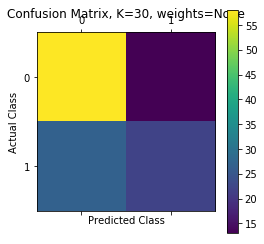

In [40]:
#Visualization Confusion Matrix, K=30, weights=None
plt.matshow(knncmnow)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix, K=30, weights=None")
plt.colorbar()
plt.show()

In [41]:
#Accuracy of training and testing, K=30, weights=none
print (knnclfnow.score(testnorm, ttest))
print (knnclfnow.score(trainnorm, ttrain))

0.6666666666666666
0.6895833333333333


In [25]:
##KNN CLassifier --with Setting up Weights parameter, Weights='distance'
##KNN CLassifier K=3
knnclf=KNeighborsClassifier(n_neighbors=3, weights='distance')
knnclf.fit(trainnorm, ttrain)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [22]:
#KNN Classifier Prediction, K=3
predclass=knnclf.predict(testnorm)
predclass

array(['YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO',
       'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'YES',
       'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO',
       'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES',
       'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES',
       'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES',
       'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO',
       'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES',
       'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO'],
      dtype=object)

In [23]:
#Compute the Accuracy, K=3
scores=classification_report(ttest, predclass)
print (scores)

             precision    recall  f1-score   support

         NO       0.74      0.69      0.72        71
        YES       0.59      0.65      0.62        49

avg / total       0.68      0.68      0.68       120



In [14]:
#Produce Confusion Matrix, K=3
knncm=confusion_matrix(ttest, predclass)
print(knncm)

[[43 20]
 [16 41]]


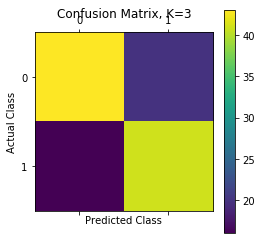

In [15]:
#Visualization Confusion Matrix, K=3
plt.matshow(knncm)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix, K=3")
plt.colorbar()
plt.show()

In [16]:
#Accuracy of training and testing, K=3
print (knnclf.score(testnorm, ttest))
print (knnclf.score(trainnorm, ttrain))

0.7
1.0


In [17]:
##KNN Classifier K=10
knnclf10=KNeighborsClassifier(n_neighbors=10, weights='distance')
knnclf10.fit(trainnorm, ttrain)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')

In [18]:
#KNN Classifier Prediction, K=10
predclass10=knnclf10.predict(testnorm)
predclass10

array(['NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES',
       'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO',
       'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO',
       'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO',
       'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO',
       'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO',
       'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO',
       'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES'],
      dtype=object)

In [19]:
#Compute the Accuracy, K=10
scores10=classification_report(ttest, predclass10)
print (scores10)

             precision    recall  f1-score   support

         NO       0.71      0.76      0.73        63
        YES       0.71      0.65      0.68        57

avg / total       0.71      0.71      0.71       120



In [20]:
#Produce Confusion Matrix, K=10
knncm10=confusion_matrix(ttest, predclass10)
print(knncm10)

[[48 15]
 [20 37]]


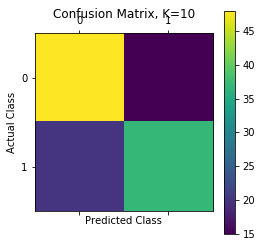

In [21]:
#Visualization Confusion Matrix, K=10
plt.matshow(knncm10)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix, K=10")
plt.colorbar()
plt.show()

In [22]:
#Accuracy of training and testing, K=10
print (knnclf10.score(testnorm, ttest))
print (knnclf10.score(trainnorm, ttrain))

0.7083333333333334
1.0


In [23]:
##KNN Classifier K=20
knnclf20=KNeighborsClassifier(n_neighbors=20, weights='distance')
knnclf20.fit(trainnorm, ttrain)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='distance')

In [24]:
#KNN Classifier Prediction, K=20
predclass20=knnclf20.predict(testnorm)
predclass20

array(['NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES',
       'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO',
       'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES',
       'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO',
       'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO',
       'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES'],
      dtype=object)

In [25]:
#Compute the Accuracy, K=20
scores20=classification_report(ttest, predclass20)
print (scores20)

             precision    recall  f1-score   support

         NO       0.72      0.73      0.72        63
        YES       0.70      0.68      0.69        57

avg / total       0.71      0.71      0.71       120



In [26]:
#Produce Confusion Matrix, K=20
knncm20=confusion_matrix(ttest, predclass20)
print(knncm20)

[[46 17]
 [18 39]]


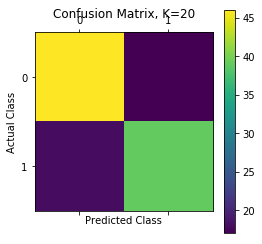

In [27]:
#Visualization Confusion Matrixm, K=20
plt.matshow(knncm20)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix, K=20")
plt.colorbar()
plt.show()

In [56]:
#Accuracy of training and testing, K=20
print (knnclf20.score(testnorm, ttest))
print (knnclf20.score(trainnorm, ttrain))

0.7083333333333334
1.0


In [29]:
##KNN Classifier K=30
knnclf30=KNeighborsClassifier(n_neighbors=30, weights='distance')
knnclf30.fit(trainnorm, ttrain)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='distance')

In [30]:
#KNN Classifier Prediction, K=30
predclass30=knnclf30.predict(testnorm)
predclass30

array(['NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES',
       'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO',
       'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO',
       'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO',
       'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES',
       'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO'], dtype=object)

In [31]:
#Compute the Accuracy, K=30
scores30=classification_report(ttest, predclass30)
print (scores30)

             precision    recall  f1-score   support

         NO       0.75      0.87      0.81        63
        YES       0.83      0.68      0.75        57

avg / total       0.79      0.78      0.78       120



In [32]:
#Produce Confusion Matrix, K=30
knncm30=confusion_matrix(ttest, predclass30)
print(knncm30)

[[55  8]
 [18 39]]


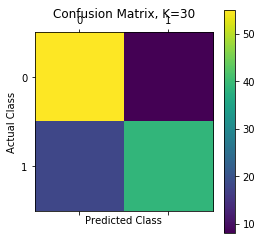

In [33]:
#Visualization Confusion Matrixm, K=30
plt.matshow(knncm30)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix, K=30")
plt.colorbar()
plt.show()

In [63]:
#Accuracy of training and testing, K=30
print (knnclf30.score(testnorm, ttest))
print (knnclf30.score(trainnorm, ttrain))

0.7833333333333333
1.0


In [55]:
##KNN Classifier K=60
knnclf60=KNeighborsClassifier(n_neighbors=60, weights='distance')
knnclf60.fit(trainnorm, ttrain)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=60, p=2,
           weights='distance')

In [36]:
#KNN Classifier Prediction, K=60
predclass60=knnclf60.predict(testnorm)
predclass60

array(['NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES',
       'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO',
       'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES',
       'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO',
       'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO',
       'YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO'], dtype=object)

In [64]:
#Compute the Accuracy, K=60
scores60=classification_report(ttest, predclass60)
print (scores60)

             precision    recall  f1-score   support

         NO       0.68      0.87      0.76        63
        YES       0.79      0.54      0.65        57

avg / total       0.73      0.72      0.71       120



In [65]:
#Produce Confusion Matrix, K=60
knncm60=confusion_matrix(ttest, predclass60)
print(knncm60)

[[55  8]
 [26 31]]


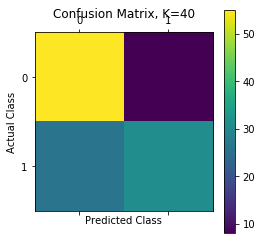

In [66]:
#Visualization Confusion Matrixm, K=60
plt.matshow(knncm60)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix, K=40")
plt.colorbar()
plt.show()

In [67]:
#Accuracy of training and testing, K=60
print (knnclf60.score(testnorm, ttest))
print (knnclf60.score(trainnorm, ttrain))

0.7166666666666667
1.0


In [68]:
##KNN Classifier K=100
knnclf100=KNeighborsClassifier(n_neighbors=100, weights='distance')
knnclf100.fit(trainnorm, ttrain)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='distance')

In [69]:
#KNN Classifier Prediction, K=100
predclass100=knnclf100.predict(testnorm)
predclass100

array(['NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES',
       'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES',
       'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES',
       'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'YES', 'NO', 'NO'], dtype=object)

In [50]:
#Produce Confusion Matrix, K=100
knncm100=confusion_matrix(ttest, predclass100)
print(knncm100)

[[60  3]
 [27 30]]


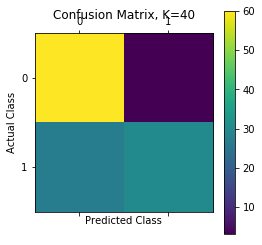

In [51]:
#Visualization Confusion Matrixm, K=100
plt.matshow(knncm100)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix, K=40")
plt.colorbar()
plt.show()

In [70]:
#Accuracy of training and testing, K=100
print (knnclf100.score(testnorm, ttest))
print (knnclf100.score(trainnorm, ttrain))

0.75
1.0


In [71]:
###2c. Repeat the Process for Decision Tree and Naive Bayers 

In [111]:
##Decision Tree
#Build a Decision Tree Classifier 
dtclf=tree.DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
dtclf.fit(btrain, ttrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [82]:
#DT Classifier Prediction
treepred=dtclf.predict(btest)
print (treepred)

['NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO'
 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES'
 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO'
 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO'
 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO'
 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES'
 'NO' 'YES']


In [85]:
#DT Classifier Classification Report
print(classification_report(ttest, treepred))

             precision    recall  f1-score   support

         NO       0.87      0.84      0.85        63
        YES       0.83      0.86      0.84        57

avg / total       0.85      0.85      0.85       120



In [87]:
#DT Confusion Matrix
treecm=confusion_matrix(ttest, treepred)
print(treecm)

[[53 10]
 [ 8 49]]


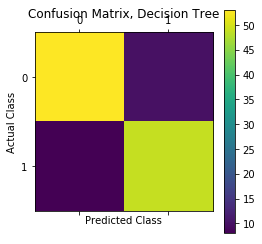

In [107]:
#DT Confusion Matrix Visualization
plt.matshow(treecm)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix, Decision Tree")
plt.colorbar()
plt.show()

In [90]:
#DT TT Accuracy 
print (dtclf.score(btrain, ttrain))
print (dtclf.score(btest, ttest))

0.99375
0.85


In [112]:
##Naive Bayes classifier (Gaussian)
#Create a Naive Bayes classifier 
nbclf= naive_bayes.GaussianNB()
nbclf.fit(btrain, ttrain)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [115]:
#NB classifier prediction
nbpred=nbclf.predict(btest)
print(nbpred)

['NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO'
 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO'
 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES'
 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO'
 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES']


In [114]:
#NB classifier classification report 
print(classification_report(ttest, nbpred))

             precision    recall  f1-score   support

         NO       0.61      0.73      0.67        63
        YES       0.62      0.49      0.55        57

avg / total       0.62      0.62      0.61       120



In [106]:
#NB Confusion Matrix 
bcm = confusion_matrix(ttest, nbpred)
print (bcm)

[[46 17]
 [29 28]]


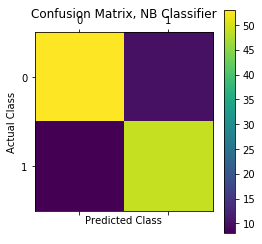

In [113]:
#NB Confusion Matrix Visualziation 
plt.matshow(treecm)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix, NB Classifier")
plt.colorbar()
plt.show()

In [110]:
#NB Classifier TT Accuracy
print (nbclf.score(btest, ttest))
print (nbclf.score(btrain, ttrain))

0.6166666666666667
0.6416666666666667
